# Wstęp, kod
W sumie nie było dużo problemów, a te co były to z mojej winy (na przykład zapomniałem ustawić 3 neuronów na wyjściu).
Najciężej chyba było pilnować czy wektor jest w postaci `OneHotEncoded` czy nie.
Oraz użerać się z matplotlibem.

Niestety mam bardzo napięty grafik, więc nie będę się rozpisywać dużo.
Z resztą tak jak napisałem wyżej - raczej nie miałem poważnych problemów.

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from importlib import reload
import mio
reload(mio)
from mio import *

Przykładowe funkcje wyjęte z mio.py
```python
def ohe_one(which, length):
    out = np.zeros(shape=(length))
    out[which] = 1.0
    return out
    
def ohe(y):
    length = len(np.unique(y))
    return np.array([ohe_one(el, length) for el in y])

def rohe(y):
    return np.argmax(y, axis=1)

def macro_f1(yhat, y):
    contingency_matrix = ohe(yhat).T @ ohe(y)
    f1 = []
    for i in range(contingency_matrix.shape[0]):
        correct   = contingency_matrix[i,i]
        precision = correct / np.sum(contingency_matrix[i, :])
        recall    = correct / np.sum(contingency_matrix[:, i])
        f1_score  = 2*(precision * recall) / (precision + recall)
        f1.append(f1_score)
    return sum(f1)/len(f1)
```

# Rings3-regular

In [273]:
dfr3 = pd.read_csv("LAB1_DANE/classification/rings3-regular-training.csv")
xr3 = np.array(dfr3.iloc[:, 0:2]).reshape((1500, 2))
yr3_org = np.array(dfr3.iloc[:, 2]).reshape((1500, 1))

In [274]:
yr3 = ohe(yr3_org)
yr3.shape

(1500, 3)

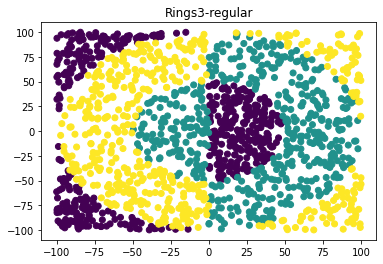

In [275]:
plt.scatter(xr3[:, 0], xr3[:, 1], c=yr3_org)
plt.title("Rings3-regular")
plt.show()

In [276]:
dfr3_test = pd.read_csv("LAB1_DANE/classification/rings3-regular-test.csv")
xr3_test = np.array(dfr3_test.iloc[:, 0:2]).reshape((2000, 2))
yr3_org_test = np.array(dfr3_test.iloc[:, 2]).reshape((2000, 1))
yr3_test = ohe(yr3_org_test)

In [322]:
nncf = NNFactory(SigmoidSoftmaxActivationStrategy(), LayerFactory(UniformInitializer()), CCESoftMaxLoss())

In [285]:
nnr3 = nncf.get((2, 32, 32, 3))
nnr3t = Trainer(
    nnr3,
    xr3,
    yr3,
    x_test=xr3_test,
    y_test=yr3_test,
    dataset_name="Rings3-regular",
    evaluator=MultiClassificationEvaluator()
)

In [286]:
nnr3t.momentum_method_batch(1_000_000, batch_size=32)
nnr3t.train_gradient(1_000) # douczenie zbioru

Rings3-regular, train F-measure (macro): 0.9653275801838509


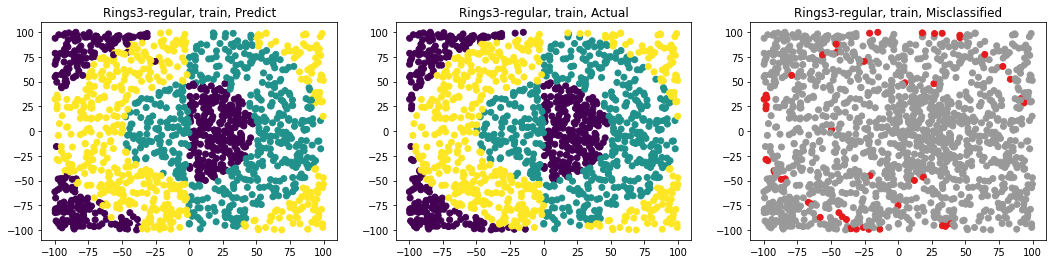

In [288]:
nnr3t.plot_results()
plt.show()

Rings3-regular, test F-measure (macro): 0.9098148506153866


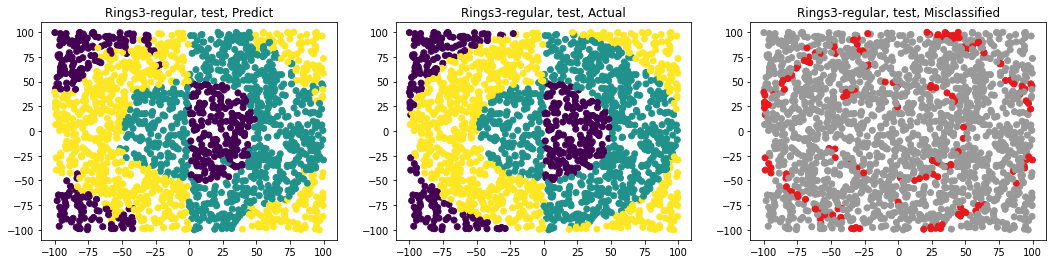

In [287]:
nnr3t.plot_results(dataset="test")
plt.show()

# Easy

In [313]:
dfez = pd.read_csv("LAB1_DANE/classification/easy-training.csv")
xez = np.array(dfez.iloc[:, 0:2]).reshape((500, 2))
yez_org = np.array(dfez.iloc[:, 2]).reshape((500, 1)) + 0
yez = ohe(yez_org)

In [314]:
dfez_test = pd.read_csv("LAB1_DANE/classification/easy-test.csv")
xez_test = np.array(dfez_test.iloc[:, 0:2]).reshape((500, 2))
yez_test_org = np.array(dfez_test.iloc[:, 2]).reshape((500, 1)) + 0
yez_test = ohe(yez_test_org)

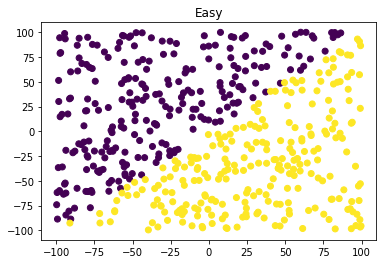

In [315]:
plt.scatter(xez[:, 0], xez[:, 1], c=yez_org)
plt.title("Easy")
plt.show()

In [323]:
nnez = nncf.get((2, 32, 32, 2))
nnezt = Trainer(
    nnez,
    xez,
    yez,
    x_test=xez_test,
    y_test=yez_test,
    dataset_name="Easy",
    evaluator=MultiClassificationEvaluator()
)

In [324]:
nnezt.momentum_method_batch(100_000)

Easy, train F-measure (macro): 1.0


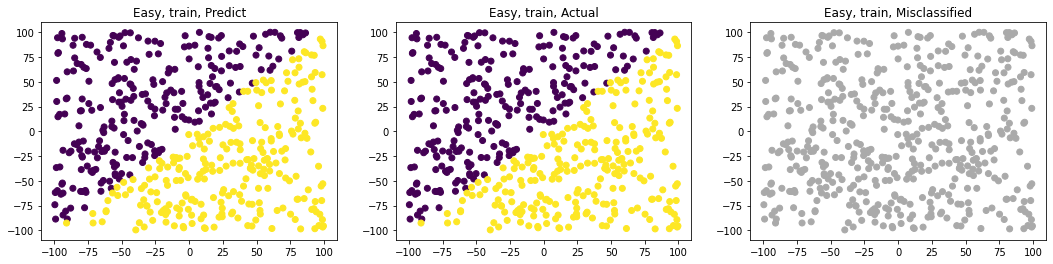

In [325]:
nnezt.plot_results(dataset="train")
plt.show()

Easy, test F-measure (macro): 0.9979999279974079


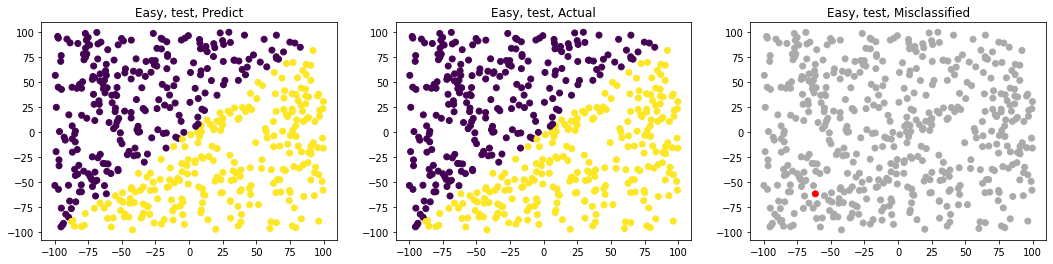

In [326]:
nnezt.plot_results(dataset="test")
plt.show()

# XOR3

In [329]:
dfxo = pd.read_csv("LAB1_DANE/classification/xor3-training.csv")
xxo = np.array(dfxo.iloc[:, 0:2]).reshape((500, 2))
yxo_org = np.array(dfxo.iloc[:, 2]).reshape((500, 1)) + 0
yxo = ohe(yxo_org)

dfxo_test = pd.read_csv("LAB1_DANE/classification/xor3-training.csv")
xxo_test = np.array(dfxo_test.iloc[:, 0:2]).reshape((500, 2))
yxo_test_org = np.array(dfxo_test.iloc[:, 2]).reshape((500, 1)) + 0
yxo_test = ohe(yxo_test_org)

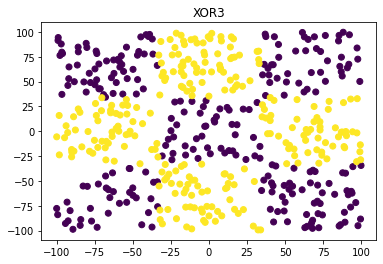

In [331]:
plt.scatter(xxo[:, 0], xxo[:, 1], c=yxo_org)
plt.title("XOR3")
plt.show()

In [337]:
nnxo = nncf.get((2, 32, 32, 2))
nnxot = Trainer(
    nnxo,
    xxo,
    yxo,
    x_test=xxo_test,
    y_test=yxo_test,
    dataset_name="XOR3",
    evaluator=MultiClassificationEvaluator()
)

In [338]:
nnxot.momentum_method_batch(1_000_000)
nnxot.train_gradient(1_000)

XOR3, train F-measure (macro): 0.996


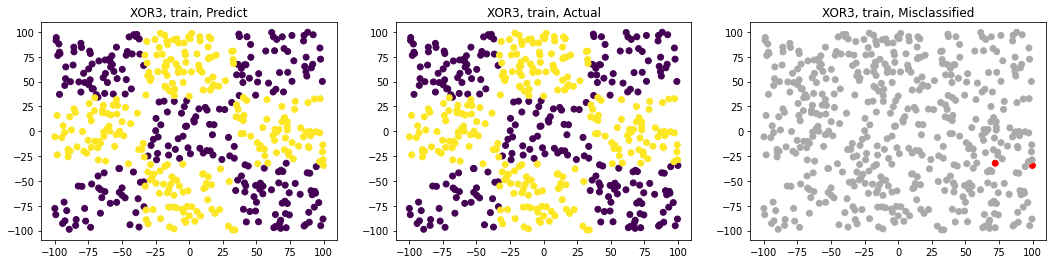

In [339]:
nnxot.plot_results()
plt.show()

XOR3, test F-measure (macro): 0.996


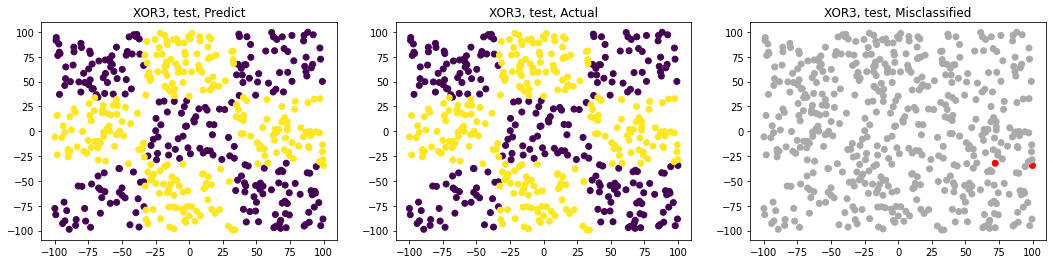

In [340]:
nnxot.plot_results(dataset="test")
plt.show()

# Prędkości
Zmierzę swoje 4 zaimplementowane metody na zbiorze XOR3.

In [358]:
f1_fromohe = lambda yhat, y: macro_f1(rohe(yhat), rohe(y))
f1_fromohe.__name__ = "F1-measure (macro)"

momentum
F1-measure (macro) at 16.79s: 0.8719918074756785None
batch
F1-measure (macro) at 15.95s: 0.8519621022981884None
gradient
F1-measure (macro) at 14.19s: 0.6299985199940845None
rmsprop
F1-measure (macro) at 14.58s: 0.9559971838197644None


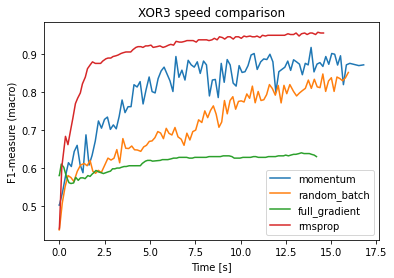

In [364]:
print("momentum")
nn = nncf.get((2, 32, 2))
nnt = Trainer(nn, xxo, yxo, tracker=TimeLossTracker(1_000, f1_fromohe))
nnt.momentum_method_batch(100_000, batch_size=10)
nnt.plot_progress()

print("batch")
nn = nncf.get((2, 32, 2))
nnt = Trainer(nn, xxo, yxo, tracker=TimeLossTracker(1_000, f1_fromohe))
nnt.train_random_batch(100_000, batch_size=10)
nnt.plot_progress()

print("gradient")
nn = nncf.get((2, 32, 2))
nnt = Trainer(nn, xxo, yxo, tracker=TimeLossTracker(100, f1_fromohe))
nnt.train_gradient(10_000)
nnt.plot_progress()

print("rmsprop")
nn = nncf.get((2, 32, 2))
nnt = Trainer(nn, xxo, yxo, tracker=TimeLossTracker(100, f1_fromohe))
nnt.rmsprop_method(10_000)
nnt.plot_progress()

plt.legend(["momentum", "random_batch", "full_gradient", "rmsprop"])
plt.ylabel("F1-measure (macro)")
plt.xlabel("Time [s]")
plt.title("XOR3 speed comparison")
plt.show()

RMSProp najszybszy, i to jeszcze jak!
Czyli jednak nie zrobiłem błędu w implementacji, a po prostu problemy nie podchodziły.